In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_percentage_error 

In [2]:
#loading the datasets

df = pd.read_csv('D:\\DataScience\\Term 1\\8.IML\\insurance_data.csv')

In [3]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df = df.drop('index',axis = 1)

In [5]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [6]:
df.isna().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [7]:
df.isna().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [9]:
#There are null values in the age,region columns

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1332 non-null   int64  
 1   age            1332 non-null   float64
 2   gender         1332 non-null   object 
 3   bmi            1332 non-null   float64
 4   bloodpressure  1332 non-null   int64  
 5   diabetic       1332 non-null   object 
 6   children       1332 non-null   int64  
 7   smoker         1332 non-null   object 
 8   region         1332 non-null   object 
 9   claim          1332 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 114.5+ KB


In [12]:
df_num = df.select_dtypes('number')

In [13]:
df_num.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,674.474474,38.086336,30.658333,94.189189,1.099850,13325.246426
std,384.703785,11.112804,6.118967,11.445173,1.205958,12109.620712
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,341.750000,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,674.500000,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,1007.250000,47.000000,34.725000,99.000000,2.000000,16781.327500
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [14]:
#There are outliers in the bmi,bloodpressure,children,claims

In [15]:
df_num = df_num.drop('PatientID',axis = 1)

In [16]:
df_num.head()

,age,bmi,bloodpressure,children,claim
0,39.0,23.2,91,0,1121.87
1,24.0,30.1,87,0,1131.51
7,19.0,41.1,100,0,1146.80
8,20.0,43.0,86,0,1149.40
9,30.0,53.1,97,0,1163.46


C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


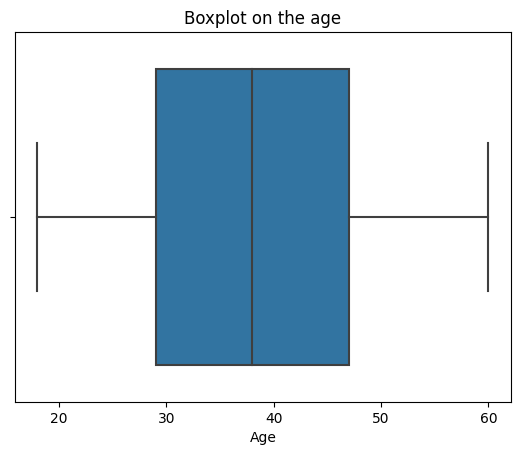

In [17]:
sns.boxplot(data = df_num,x = 'age')
plt.xlabel("Age")
plt.title("Boxplot on the age")
plt.show()

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


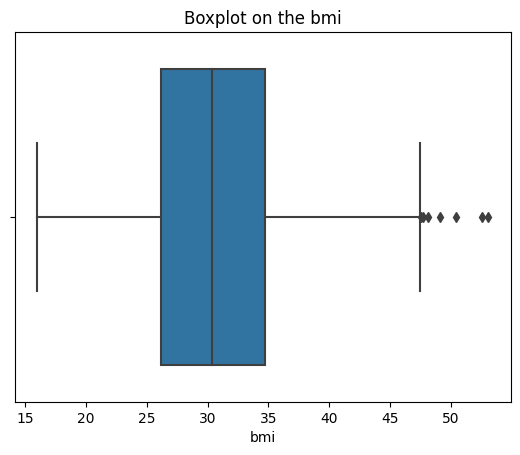

In [18]:
sns.boxplot(data = df_num,x = 'bmi')
plt.xlabel("bmi")
plt.title("Boxplot on the bmi")
plt.show()

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


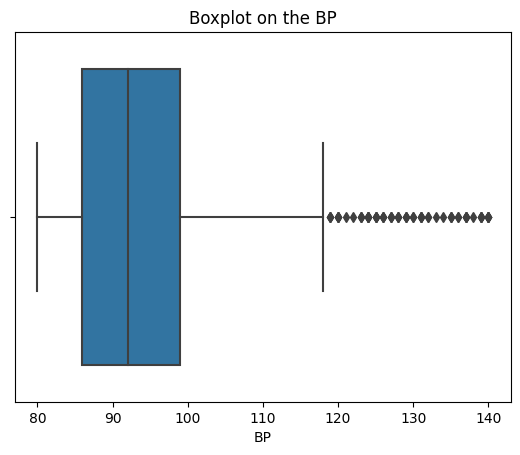

In [19]:
sns.boxplot(data = df_num,x = 'bloodpressure')
plt.xlabel("BP")
plt.title("Boxplot on the BP")
plt.show()

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


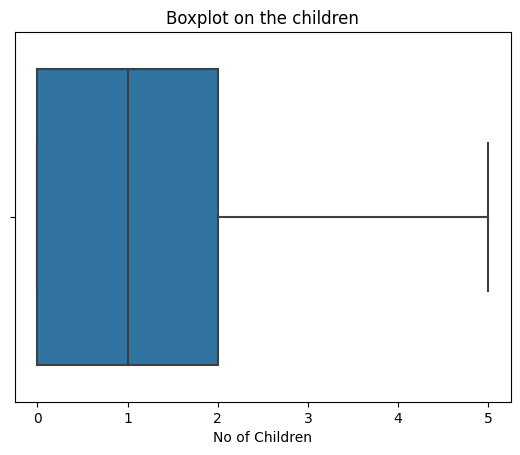

In [20]:
sns.boxplot(data = df_num,x = 'children')
plt.xlabel("No of Children")
plt.title("Boxplot on the children")
plt.show()

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


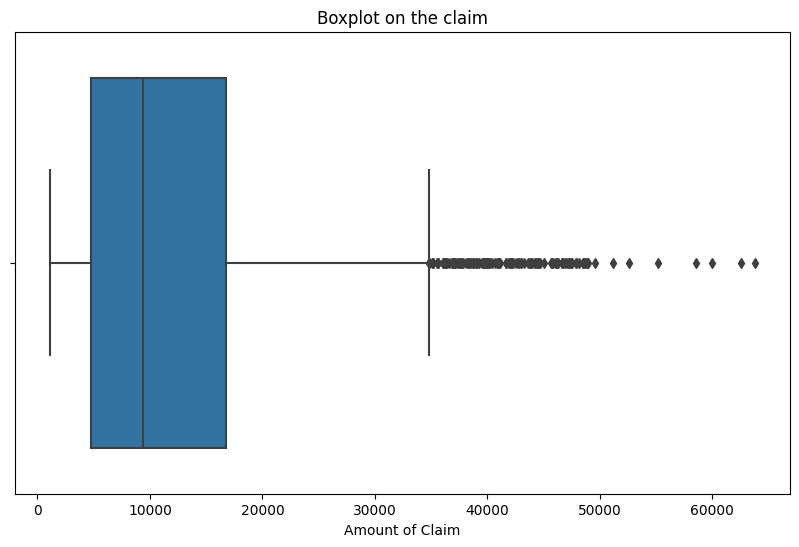

In [21]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df_num,x = 'claim')
plt.xlabel("Amount of Claim")
plt.title("Boxplot on the claim")
plt.show()

In [22]:
#Outlier Filter

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [23]:
lower_bound

age                  2.0000
bmi                 13.4125
bloodpressure       66.5000
children            -3.0000
claim           -13271.5975
dtype: float64

In [24]:
upper_bound

age                 74.0000
bmi                 47.5125
bloodpressure      118.5000
children             5.0000
claim            34813.0825
dtype: float64

In [25]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [26]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
10,11,36.0,male,19.8,88,Yes,0,No,northwest,1241.57


In [27]:
df = df.drop('PatientID',axis = 1)

In [28]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,20.0,male,43.0,86,No,0,No,northwest,1149.40
10,36.0,male,19.8,88,Yes,0,No,northwest,1241.57


In [29]:
X = df.drop('claim',axis = 1)
X.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
0,39.0,male,23.2,91,Yes,0,No,southeast
1,24.0,male,30.1,87,No,0,No,southeast
7,19.0,male,41.1,100,No,0,No,northwest
8,20.0,male,43.0,86,No,0,No,northwest
10,36.0,male,19.8,88,Yes,0,No,northwest


In [30]:
y = df['claim']
y

0        1121.87
1        1131.51
7        1146.80
8        1149.40
10       1241.57
          ...   
1199    34439.86
1200    34472.84
1201    34617.84
1203    34779.62
1204    34806.47
Name: claim, Length: 1174, dtype: float64

In [31]:
X_num = X.select_dtypes(include = 'number')
X_num

,age,bmi,bloodpressure,children
0,39.0,23.2,91,0
1,24.0,30.1,87,0
7,19.0,41.1,100,0
8,20.0,43.0,86,0
10,36.0,19.8,88,0
...,...,...,...,...
1199,30.0,33.1,93,0
1200,40.0,32.7,98,0
1201,45.0,33.5,81,0
1203,26.0,34.8,94,0


In [32]:
X_cat = X.select_dtypes(include = 'object')
X_cat

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
7,male,No,No,northwest
8,male,No,No,northwest
10,male,Yes,No,northwest
...,...,...,...,...
1199,female,Yes,Yes,southeast
1200,male,No,Yes,southwest
1201,male,No,Yes,northeast
1203,male,Yes,Yes,southwest


In [33]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled

array([[0.5       , 0.22857143, 0.28947368, 0.        ],
       [0.14285714, 0.44761905, 0.18421053, 0.        ],
       [0.02380952, 0.7968254 , 0.52631579, 0.        ],
       ...,
       [0.64285714, 0.55555556, 0.02631579, 0.        ],
       [0.19047619, 0.5968254 , 0.36842105, 0.        ],
       [0.33333333, 0.47936508, 0.89473684, 0.2       ]])

In [34]:
type(X_num_scaled)

numpy.ndarray

In [35]:
X_num_scaled = pd.DataFrame(X_num_scaled,columns = X_num.columns,index = X_num.index )
X_num_scaled.head()

,age,bmi,bloodpressure,children
0,0.500000,0.228571,0.289474,0.0
1,0.142857,0.447619,0.184211,0.0
7,0.023810,0.796825,0.526316,0.0
8,0.047619,0.857143,0.157895,0.0
10,0.428571,0.120635,0.210526,0.0


In [36]:
X_cat_encoded = pd.get_dummies(X_cat,drop_first = False,dtype = int )
X_cat_encoded

,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,1,1,0,0,0,1,0
1,0,1,1,0,1,0,0,0,1,0
7,0,1,1,0,1,0,0,1,0,0
8,0,1,1,0,1,0,0,1,0,0
10,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1199,1,0,0,1,0,1,0,0,1,0
1200,0,1,1,0,0,1,0,0,0,1
1201,0,1,1,0,0,1,1,0,0,0
1203,0,1,0,1,0,1,0,0,0,1


In [37]:
X = pd.concat([X_num_scaled,X_cat_encoded],axis = 1)
X.head()

,age,bmi,bloodpressure,children,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.500000,0.228571,0.289474,0.0,0,1,0,1,1,0,0,0,1,0
1,0.142857,0.447619,0.184211,0.0,0,1,1,0,1,0,0,0,1,0
7,0.023810,0.796825,0.526316,0.0,0,1,1,0,1,0,0,1,0,0
8,0.047619,0.857143,0.157895,0.0,0,1,1,0,1,0,0,1,0,0
10,0.428571,0.120635,0.210526,0.0,0,1,0,1,1,0,0,1,0,0


In [38]:
X.shape,X_num_scaled.shape,X_cat_encoded.shape

((1174, 14), (1174, 4), (1174, 10))

In [39]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

age                 0
bmi                 0
bloodpressure       0
children            0
gender_female       0
gender_male         0
diabetic_No         0
diabetic_Yes        0
smoker_No           0
smoker_Yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64
0
(1174, 14)
(1174,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(939, 14)
(235, 14)
(939,)
(235,)


In [42]:
X_train.head()

,age,bmi,bloodpressure,children,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
874,0.166667,0.273016,0.000000,0.6,1,0,0,1,1,0,0,1,0,0
270,0.666667,0.895238,0.289474,0.0,1,0,0,1,1,0,0,0,1,0
604,0.380952,0.295238,0.526316,0.0,0,1,1,0,1,0,0,0,1,0
194,0.928571,0.336508,0.078947,0.0,1,0,1,0,1,0,1,0,0,0
653,0.714286,0.307937,0.342105,0.6,1,0,1,0,1,0,0,0,0,1


In [43]:
print(X_test.head())
print(y_test.head())

          age       bmi  bloodpressure  children  gender_female  gender_male  \
420  0.952381  0.431746       0.394737       0.0              1            0   
440  0.571429  0.422222       0.105263       0.6              1            0   
686  0.523810  0.365079       0.026316       0.2              0            1   
218  0.714286  0.311111       0.052632       0.2              0            1   
824  0.261905  0.400000       0.131579       0.0              0            1   

     diabetic_No  diabetic_Yes  smoker_No  smoker_Yes  region_northeast  \
420            0             1          1           0                 0   
440            1             0          1           0                 0   
686            0             1          1           0                 1   
218            0             1          1           0                 1   
824            0             1          1           0                 0   

     region_northwest  region_southeast  region_southwest  
420     

In [44]:
k_values = np.arange(1,21,2)
k_values

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [45]:
train_map_values = []
test_map_values = []
cv_mape_values = []

In [46]:
for i in k_values:
    #Training the model on X_train,y_train
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    
    #Calulcating the error in training dataset
    pred=model.predict(X_train)
    error_train = mean_absolute_percentage_error(y_train,pred)
    train_map_values.append(error_train)
    
    #Calulcating the error in test dataset
    pred_test = model.predict(X_test)
    error_test = mean_absolute_percentage_error(y_test,pred_test)
    test_map_values.append(error_test)
    
    #Calculating the error using Cross Validation
    cv_scores = -cross_val_score(model,X,y,cv = 5,scoring ='neg_mean_absolute_percentage_error' )
    cv_mape = np.mean(cv_scores)
    cv_mape_values.append(cv_mape)

In [47]:
train_map_values

[0.0,
 0.52209641917046,
 0.6189412098787953,
 0.6436503408757963,
 0.658267312708758,
 0.6660470209593263,
 0.6806377852733481,
 0.6886002001809727,
 0.6966413982222946,
 0.6975551015723522]

In [48]:
test_map_values

[0.714134278022618,
 0.7527413837745928,
 0.6973608281023032,
 0.6871856377142453,
 0.7038063073519996,
 0.7057972161214155,
 0.6987840378387391,
 0.706278184649064,
 0.6995039465766697,
 0.6934624684984778]

In [49]:
cv_mape_values

[1.2047962575133697,
 1.1260553979996606,
 1.0944654869950179,
 1.072166213544025,
 1.0585858659881464,
 1.0512978028639473,
 1.0420820468892769,
 1.0404770582971168,
 1.0393345780121126,
 1.0402968830859014]

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

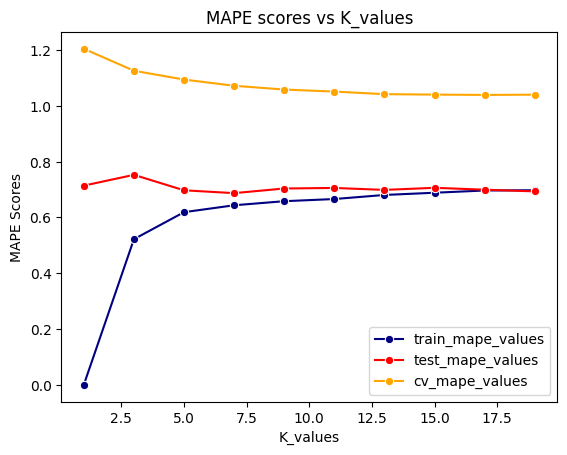

The best k_value:  17


In [50]:
sns.lineplot(x = k_values,y = train_map_values,marker = 'o' ,color = 'navy',label = 'train_mape_values')
sns.lineplot(x = k_values,y = test_map_values,marker = 'o' ,color = 'Red',label = 'test_mape_values')
sns.lineplot(x = k_values,y = cv_mape_values,marker = 'o',color = 'orange',label = 'cv_mape_values')
plt.xlabel('K_values')
plt.ylabel('MAPE Scores')
plt.title('MAPE scores vs K_values')
plt.show()

#best_cv_value_is
best_k_cv = k_values[np.argmin(cv_mape_values)]
print("The best k_value: ",best_k_cv)

# kNN using Numpy and Pandas

In [91]:
partial_data = X_train.iloc[0:11,:]
partial_data_y = y_train.iloc[0:11]

In [92]:
distance = []

In [93]:
partial_data

,age,bmi,bloodpressure,children,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
874,0.166667,0.273016,0.000000,0.6,1,0,0,1,1,0,0,1,0,0
270,0.666667,0.895238,0.289474,0.0,1,0,0,1,1,0,0,0,1,0
604,0.380952,0.295238,0.526316,0.0,0,1,1,0,1,0,0,0,1,0
194,0.928571,0.336508,0.078947,0.0,1,0,1,0,1,0,1,0,0,0
653,0.714286,0.307937,0.342105,0.6,1,0,1,0,1,0,0,0,0,1
188,0.404762,0.444444,0.157895,0.2,0,1,1,0,1,0,0,0,0,1
751,0.738095,0.533333,0.236842,0.0,0,1,1,0,1,0,0,1,0,0
732,0.833333,0.482540,0.157895,0.0,1,0,0,1,1,0,0,0,1,0
593,0.547619,0.479365,0.342105,0.0,1,0,1,0,1,0,0,0,1,0
1019,0.119048,0.380952,0.157895,0.2,0,1,0,1,0,1,0,1,0,0


In [94]:
y_hat_train = []
train_mape_values = []

In [95]:
k_values = np.arange(1,22,2)
k_values
import math


In [56]:
 for i in range(1,12):
        distance = []
        for j in range(1,12):
            dist = math.sqrt(((partial_data.iloc[j-1,:]-partial_data.iloc[i-1,:])*(partial_data.iloc[j-1,:]-partial_data.iloc[i-1,:])).sum())
            distance.append(dist)

In [96]:
(partial_data.iloc[j-2,:]-partial_data.iloc[i-1,:])

age                -0.071429
bmi                -0.247619
bloodpressure      -0.368421
children            0.200000
gender_female      -1.000000
gender_male         1.000000
diabetic_No         0.000000
diabetic_Yes        0.000000
smoker_No          -1.000000
smoker_Yes          1.000000
region_northeast    0.000000
region_northwest    0.000000
region_southeast    0.000000
region_southwest    0.000000
dtype: float64

In [103]:
len(X_train)

939

In [ ]:
for k in k_values:
    y_hat_train = []
    for i in range(1,len(X_train)+1):
        distance = []
        data = X_train
        data_y = y_train
        for j in range(1,len(X_train)+1):
            dist = math.sqrt(((data.iloc[j-1,:]-data.iloc[i-1,:])*(data.iloc[j-1,:]-data.iloc[i-1,:])).sum())
            distance.append(dist)
        data['dist'] = distance
        data['y_train'] = data_y
        data = data.sort_values(by = 'dist')
        y_hat = data.iloc[0:k,15].mean()
        y_hat_train.append(y_hat)
    error_train = mean_absolute_percentage_error(data_y,y_hat_train)
    train_mape_values.append(error_train)

In [ ]:
train_map_values

In [ ]:
train_mape_values

In [100]:
y_hat_train

[8589.266363636363,
 8589.266363636365,
 8589.266363636363,
 8589.266363636363,
 8589.266363636363,
 8589.266363636363,
 8589.266363636363,
 8589.266363636365,
 8589.266363636363,
 8589.266363636365,
 8589.266363636363]

In [101]:
print(y_hat_train)
print(partial_data_y)

[8589.266363636363, 8589.266363636365, 8589.266363636363, 8589.266363636363, 8589.266363636363, 8589.266363636363, 8589.266363636363, 8589.266363636365, 8589.266363636363, 8589.266363636365, 8589.266363636363]
874     12479.71
270      3994.18
604      8442.67
194      3046.06
653      9101.80
188      2904.09
751     10601.63
732     10338.93
593      8280.62
1019    17560.38
562      7731.86
Name: claim, dtype: float64


In [61]:
partial_data

,age,bmi,bloodpressure,children,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest,dist,y_train
270,0.666667,0.895238,0.289474,0.0,1,0,0,1,1,0,0,0,1,0,0.000000,3994.18
194,0.928571,0.336508,0.078947,0.0,1,0,1,0,1,0,1,0,0,0,1129.742872,3046.06
188,0.404762,0.444444,0.157895,0.2,0,1,1,0,1,0,0,0,0,1,1284.687474,2904.09
562,0.190476,0.628571,0.526316,0.0,1,0,0,1,1,0,0,1,0,0,7358.322961,7731.86
593,0.547619,0.479365,0.342105,0.0,1,0,1,0,1,0,0,0,1,0,8351.329711,8280.62
604,0.380952,0.295238,0.526316,0.0,0,1,1,0,1,0,0,0,1,0,8652.262069,8442.67
653,0.714286,0.307937,0.342105,0.6,1,0,1,0,1,0,0,0,0,1,9890.413994,9101.80
732,0.833333,0.482540,0.157895,0.0,1,0,0,1,1,0,0,0,1,0,12243.228180,10338.93
751,0.738095,0.533333,0.236842,0.0,0,1,1,0,1,0,0,1,0,0,12713.664976,10601.63
1019,0.119048,0.380952,0.157895,0.2,0,1,0,1,0,1,0,1,0,0,13683.936075,17560.38


In [62]:
train_mape_values

[0.5329135745731802,
 0.7118589482644233,
 0.5945897514626362,
 0.6298975115081359,
 0.7118589482644233,
 0.5945897514626362,
 0.6298975115081359,
 0.7118589482644233,
 0.5945897514626362,
 0.6298975115081359,
 0.7118589482644233]

In [63]:
partial_data = partial_data.drop(['y_hat_train','distance'],axis=1)

KeyError: "['y_hat_train', 'distance'] not found in axis"